<a href="https://colab.research.google.com/github/pandu1992/Reinfocement_Learning/blob/main/Multi_arm_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Switched to high regulatory scrutiny


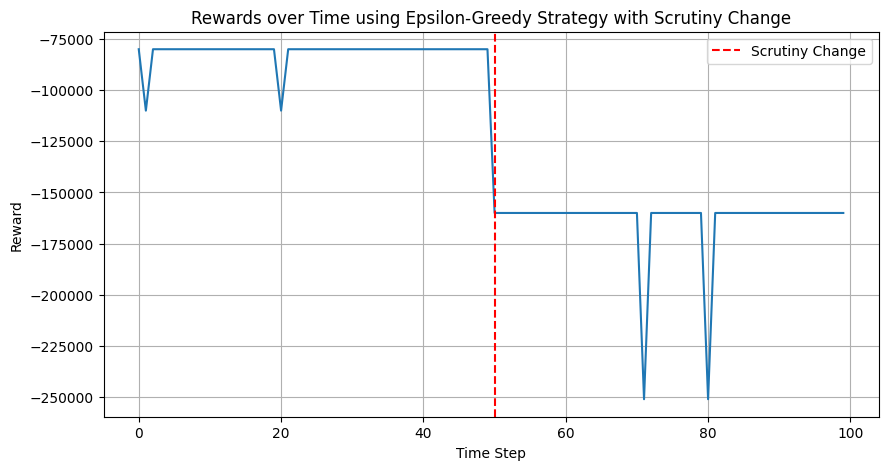

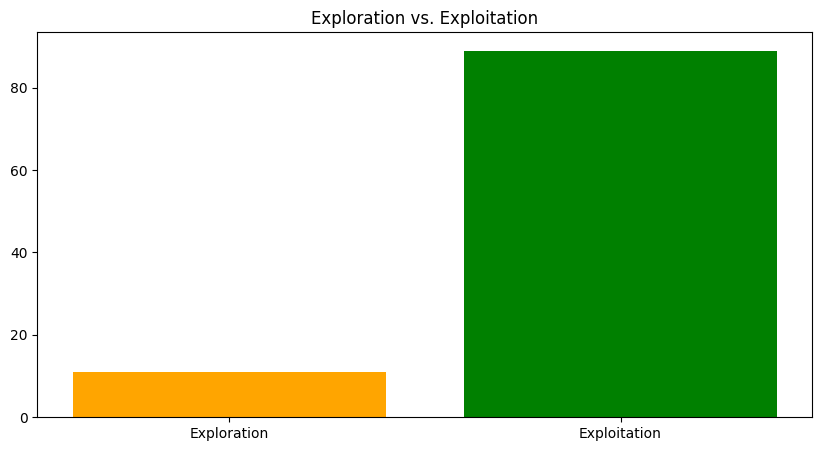

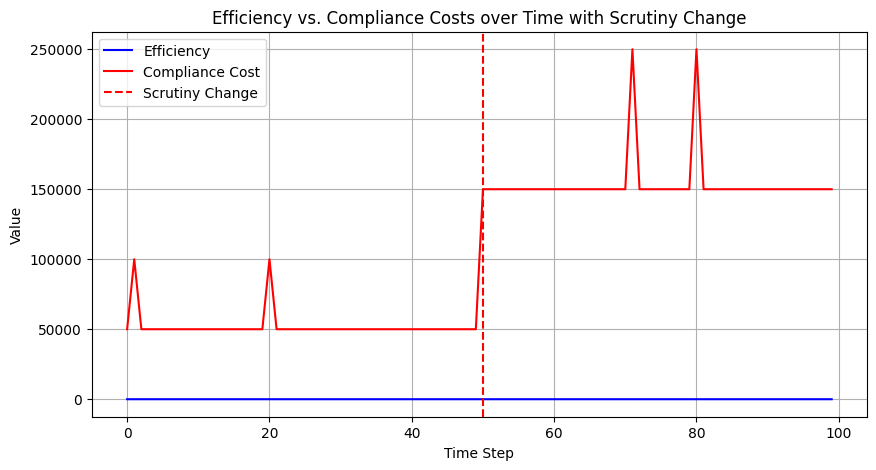

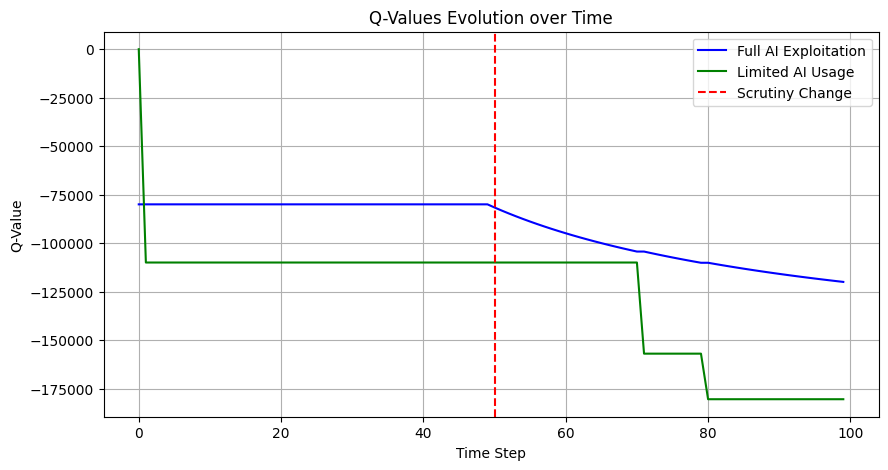

Final Q-values:
{'Full_AI_Exploitation': -119999.09750000006, 'Limited_AI_Usage': -180499.37}
Cumulative rewards: {'Full_AI_Exploitation': -11519913.360000009, 'Limited_AI_Usage': -721997.48}
Exploration Count: 11
Exploitation Count: 89


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters for both models
parameters = {
    "Full_AI_Exploitation": {
        "accuracy": 0.95,
        "false_positive_rate": 0.15,
        "bias_factor": 0.4,
        "human_review_rate": 0.05,
        "cost_of_compliance": {"low": 50000, "high": 150000},
        "gdpr_compliance": {"low": 0.7, "high": 0.9},
        "speed": 0.95
    },
    "Limited_AI_Usage": {
        "accuracy": 0.9,
        "false_positive_rate": 0.10,
        "bias_factor": 0.1,
        "human_review_rate": 0.40,
        "cost_of_compliance": {"low": 100000, "high": 250000},
        "gdpr_compliance": {"low": 0.9, "high": 0.99},
        "speed": 0.7
    }
}

# Simulation settings
time_steps = 100  # Number of time steps
epsilon = 0.1  # Exploration rate for epsilon-greedy
alpha = 1.0  # Weight for efficiency in reward calculation
beta = 1.0   # Weight for compliance cost
gamma = 1.0  # Weight for penalties

# Initialize exploration-exploitation counters
exploration_count = 0
exploitation_count = 0

# Lists to track rewards, chosen arms, and other metrics
rewards_history = []
chosen_arms = []
efficiency_history = []
compliance_cost_history = []
cumulative_rewards = {"Full_AI_Exploitation": 0, "Limited_AI_Usage": 0}

# Initialize Q-values for both arms (Full AI Exploitation, Limited AI Usage)
Q_values = {"Full_AI_Exploitation": 0, "Limited_AI_Usage": 0}
N = {"Full_AI_Exploitation": 0, "Limited_AI_Usage": 0}  # Number of times each arm is chosen

# Start with low scrutiny, switch to high scrutiny halfway through
scrutiny_level = "low"

# Track Q-values over time
Q_values_history = {"Full_AI_Exploitation": [], "Limited_AI_Usage": []}

# Function to calculate reward for each arm
def calculate_reward(model, scrutiny_level):
    efficiency = parameters[model]["accuracy"] * parameters[model]["speed"]
    compliance_cost = parameters[model]["cost_of_compliance"][scrutiny_level]
    penalty = (1 - parameters[model]["gdpr_compliance"][scrutiny_level]) * 100000

    # Reward function: the higher the efficiency, the better, and lower costs/penalties give better rewards
    reward = alpha * efficiency - beta * compliance_cost - gamma * penalty
    return reward

# Epsilon-greedy algorithm
for t in range(time_steps):
    if t == time_steps // 2:
        # Switch from low to high scrutiny halfway through the simulation
        scrutiny_level = "high"
        print("Switched to high regulatory scrutiny")

    if np.random.rand() < epsilon:
        # Exploration
        chosen_arm = np.random.choice(["Full_AI_Exploitation", "Limited_AI_Usage"])
        exploration_count += 1
    else:
        # Exploitation
        chosen_arm = max(Q_values, key=Q_values.get)
        exploitation_count += 1

    # Calculate reward for the chosen arm
    reward = calculate_reward(chosen_arm, scrutiny_level)

    # Update Q-value for the chosen arm (incremental mean calculation)
    N[chosen_arm] += 1
    Q_values[chosen_arm] += (reward - Q_values[chosen_arm]) / N[chosen_arm]

    # Track cumulative rewards
    cumulative_rewards[chosen_arm] += reward

    # Track the chosen arm and the reward
    chosen_arms.append(chosen_arm)
    rewards_history.append(reward)

    # Track efficiency and compliance cost separately for analysis
    efficiency = parameters[chosen_arm]["accuracy"] * parameters[chosen_arm]["speed"]
    compliance_cost = parameters[chosen_arm]["cost_of_compliance"][scrutiny_level]
    efficiency_history.append(efficiency)
    compliance_cost_history.append(compliance_cost)

    # Track Q-values over time
    Q_values_history["Full_AI_Exploitation"].append(Q_values["Full_AI_Exploitation"])
    Q_values_history["Limited_AI_Usage"].append(Q_values["Limited_AI_Usage"])

# Plotting the results

# Plot rewards over time
plt.figure(figsize=(10,5))
plt.plot(rewards_history)
plt.title("Rewards over Time using Epsilon-Greedy Strategy with Scrutiny Change")
plt.axvline(x=time_steps//2, color='red', linestyle='--', label='Scrutiny Change')
plt.xlabel("Time Step")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

# Plot exploration-exploitation ratio
plt.figure(figsize=(10,5))
plt.bar(["Exploration", "Exploitation"], [exploration_count, exploitation_count], color=['orange', 'green'])
plt.title("Exploration vs. Exploitation")
plt.show()

# Plot efficiency vs. compliance costs over time
plt.figure(figsize=(10,5))
plt.plot(efficiency_history, label='Efficiency', color='blue')
plt.plot(compliance_cost_history, label='Compliance Cost', color='red')
plt.title("Efficiency vs. Compliance Costs over Time with Scrutiny Change")
plt.axvline(x=time_steps//2, color='red', linestyle='--', label='Scrutiny Change')
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot Q-values evolution over time
plt.figure(figsize=(10,5))
plt.plot(Q_values_history["Full_AI_Exploitation"], label='Full AI Exploitation', color='blue')
plt.plot(Q_values_history["Limited_AI_Usage"], label='Limited AI Usage', color='green')
plt.title("Q-Values Evolution over Time")
plt.axvline(x=time_steps//2, color='red', linestyle='--', label='Scrutiny Change')
plt.xlabel("Time Step")
plt.ylabel("Q-Value")
plt.legend()
plt.grid(True)
plt.show()

# Final Q-values for both arms
print("Final Q-values:")
print(Q_values)

# Cumulative rewards for each model
print(f"Cumulative rewards: {cumulative_rewards}")

# Exploration and Exploitation counts
print(f"Exploration Count: {exploration_count}")
print(f"Exploitation Count: {exploitation_count}")
